<a href="https://colab.research.google.com/github/thiru2024/ethnicity_prediction/blob/main/CODE-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETHNICITY PREDICTIONS **USING TRANSFER LEARNING

In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential

**PRETRAINED MODEL (VGG19-IMAGENET)**

In [2]:
image_size = [150,150]
model = VGG19(input_shape = image_size+[3],include_top=False,weights='imagenet')


80150528/80134624 [==============================] - 1s 0us/step


In [3]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
final = Model(inputs = model.input,outputs = Dense(1,activation = 'sigmoid')(Flatten()(model.output)))

In [5]:
final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
final.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA AUGMENTATION AND INTERPOLATION**

In [8]:
train = '/content/drive/My Drive/ethinicity_predictor/train'
train_aug = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2, 
                                  horizontal_flip=True, 
                                  fill_mode='nearest')
final_train = train_aug.flow_from_directory(train,target_size=(150,150),batch_size=15,class_mode ='binary')

Found 568 images belonging to 2 classes.


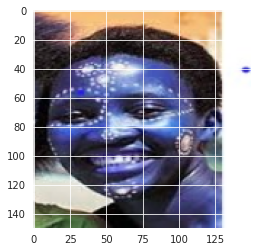

In [77]:
import matplotlib.pyplot as plt
import random
import os
import cv2
categories = ['asian','african']
data = []
for cat in categories:
  folder = os.path.join(train,cat)
  label = categories.index(cat)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(150,150))
    data.append([img_arr,label])
    plt.imshow(img_arr)

In [27]:
x = []
y = []
for features,labels in data:
  x.append(features)
  y.append(labels)

In [28]:
import numpy as np

x = np.array(x)
y = np.array(y)
x.shape

(569, 150, 150, 3)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**TRAINING AND TESTING**

In [30]:
vgg19 = final.fit(X_train,y_train,epochs=10,batch_size=35,validation_data=(X_test, y_test))

Epoch 1/10
12/12 [==============================] - 4s 308ms/step - loss: 14.6273 - accuracy: 0.3090 - val_loss: 9.0010 - val_accuracy: 0.7193
Epoch 2/10
12/12 [==============================] - 4s 304ms/step - loss: 4.2749 - accuracy: 0.7814 - val_loss: 8.2083 - val_accuracy: 0.7719
Epoch 3/10
12/12 [==============================] - 4s 304ms/step - loss: 1.9754 - accuracy: 0.8945 - val_loss: 7.6977 - val_accuracy: 0.7778
Epoch 4/10
12/12 [==============================] - 4s 305ms/step - loss: 0.7811 - accuracy: 0.9296 - val_loss: 7.3532 - val_accuracy: 0.8070
Epoch 5/10
12/12 [==============================] - 4s 304ms/step - loss: 0.2706 - accuracy: 0.9749 - val_loss: 7.2064 - val_accuracy: 0.7953
Epoch 6/10
12/12 [==============================] - 4s 302ms/step - loss: 0.1020 - accuracy: 0.9799 - val_loss: 7.2185 - val_accuracy: 0.7778
Epoch 7/10
12/12 [==============================] - 4s 302ms/step - loss: 0.0434 - accuracy: 0.9899 - val_loss: 7.1139 - val_accuracy: 0.7719
Epoch

In [14]:
final.save('imagevgg19')

INFO:tensorflow:Assets written to: imagevgg19/assets


In [61]:
import numpy as np
predictions = final.predict(
    X_test, steps=None, callbacks=None, max_queue_size=10, workers=1,
    use_multiprocessing=False, verbose=0)# Vector of probabilities
#pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
z = []
def get_class(predictions):
  if predictions > 0.5:
    z.append(1)
  else:
    z.append(0)
for predictions in predictions:
  get_class(predictions)
z = np.array(z)

In [62]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, z)
print('Accuracy: %.2f' % acc)

Accuracy: 0.80


**LOSS AND ACCURACY PLOT**

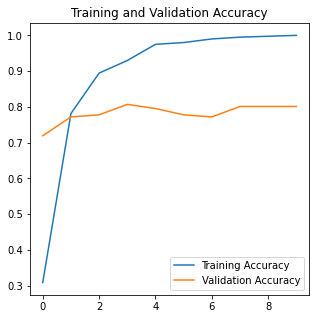

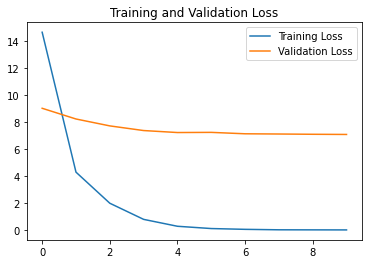

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
acc = vgg19.history['accuracy']
val_acc = vgg19.history['val_accuracy']
loss = vgg19.history['loss']
val_loss = vgg19.history['val_loss']

epochs = range(10)
plt.figure(figsize=(5, 5))
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.subplot(1, 1, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Confusion matrix, without normalization
[[61 16]
 [18 76]]


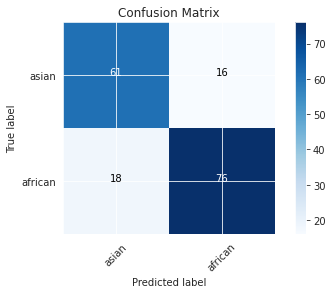

In [76]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=z)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['asian','african']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**CONFUSION** **MATRIX**

Confusion matrix, without normalization
[[61 16]
 [18 76]]


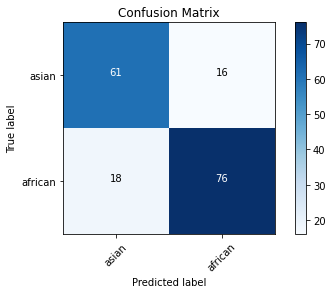

In [65]:
cm_plot_labels = ['asian','african']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**ACCURACY, PRECISION, RECALL_SCORE, F1_SCORE, COHEN_KAPPA_SCORE, ROC/auc SCORE**

In [66]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
# predict probabilities for test set
yhat_probs = final.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = z
# reduce to 1d array

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.801170
Precision: 0.826087
Recall: 0.808511
F1 score: 0.817204
Cohens kappa: 0.599311
ROC AUC: 0.830547
[[61 16]
 [18 76]]


**AUC** **PLOT**

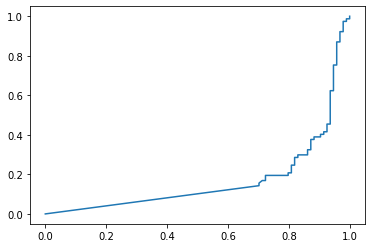

AUC: 0.16945288753799392


In [72]:
import matplotlib.pyplot as plt

y_true = y_test
y_probas = yhat_probs
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

**ROC** **CURVE**

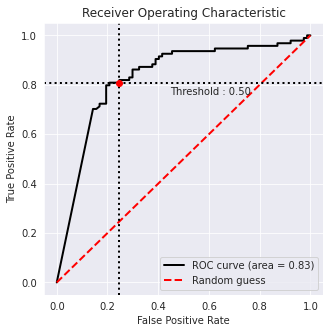

In [75]:
import plot_metric
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_true, y_probas, labels=["african", "asian"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()